<a href="https://colab.research.google.com/github/emguz/CSE-151A-Project/blob/main/cse_151a_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# CSV File Upload

In [52]:
# all_data_csv = glob.glob("data/*.csv")
from google.colab import files
# Choosing Kaggle key file from local computer
# To get a kaggle key, you have to log into your kaggle account and go to your account settings
# Scroll down to the API section and create a new token
# You should be able to download a file named 'kaggle' and this is the one you upload
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nicholasjobe","key":"2bc6a9d3cfd2aaa329682ac2257596bd"}'}

In [53]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [54]:
!kaggle datasets download -d mexwell/nba-shots

Dataset URL: https://www.kaggle.com/datasets/mexwell/nba-shots
License(s): other
 97% 78.0M/80.4M [00:04<00:00, 24.8MB/s]
100% 80.4M/80.4M [00:04<00:00, 17.1MB/s]


In [55]:
!unzip \*.zip && rm *.zip

Archive:  nba-shots.zip
  inflating: NBA_2004_Shots.csv      
  inflating: NBA_2005_Shots.csv      
  inflating: NBA_2006_Shots.csv      
  inflating: NBA_2007_Shots.csv      
  inflating: NBA_2008_Shots.csv      
  inflating: NBA_2009_Shots.csv      
  inflating: NBA_2010_Shots.csv      
  inflating: NBA_2011_Shots.csv      
  inflating: NBA_2012_Shots.csv      
  inflating: NBA_2013_Shots.csv      
  inflating: NBA_2014_Shots.csv      
  inflating: NBA_2015_Shots.csv      
  inflating: NBA_2016_Shots.csv      
  inflating: NBA_2017_Shots.csv      
  inflating: NBA_2018_Shots.csv      
  inflating: NBA_2019_Shots.csv      
  inflating: NBA_2020_Shots.csv      
  inflating: NBA_2021_Shots.csv      
  inflating: NBA_2022_Shots.csv      
  inflating: NBA_2023_Shots.csv      
  inflating: NBA_2024_Shots.csv      


In [56]:
# Consolidating all csv files
import os
file_names = os.listdir()
all_data_csv = [file for file in file_names if file.endswith('.csv')]

In [57]:
dfs_combine = []

# for each file, add to dfs_combine
for file in all_data_csv:
    df = pd.read_csv(file)
    dfs_combine.append(df)

# join dfs together
df_all_data = pd.concat(dfs_combine, ignore_index=True)

# save combined dfs into new file
df_all_data.to_csv('all_years.csv', index=False)

In [58]:
# removes the individual year csv files from directory
for file in all_data_csv:
  os.remove(file)


# Exploration

In [59]:
data = pd.read_csv('all_years.csv')

In [60]:
print('Data Columns: ')
print(data.columns)
print('Data Shape: ')
print(data.shape)

Data Columns: 
Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')
Data Shape: 
(4231262, 26)


In [61]:
data.head()

SEASON_1 SEASON_2     TEAM_ID            TEAM_NAME  PLAYER_ID  \
0      2007  2006-07  1610612741        Chicago Bulls       2550   
1      2007  2006-07  1610612741        Chicago Bulls       2732   
2      2007  2006-07  1610612766    Charlotte Bobcats     101109   
3      2007  2006-07  1610612760  Seattle SuperSonics     200754   
4      2007  2006-07  1610612752      New York Knicks       2201   

      PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0    Kirk Hinrich              G       PG  04-18-2007  20601222  ...   
1      Ben Gordon              G       SG  04-18-2007  20601222  ...   
2  Raymond Felton              G       PG  04-18-2007  20601218  ...   
3   Mouhamed Sene              C        C  04-18-2007  20601229  ...   
4      Eddy Curry              C        C  04-18-2007  20601218  ...   

        BASIC_ZONE   ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0   Right Corner 3  Right Side        R          24+ ft. -23.5   4.65   
1   Right Corner 3  Right Side        R          24+ ft. -23.2   3.35   
2        Backcourt  Back Court       BC  Back Court Shot  10.3  63.95   
3        Mid-Range   Left Side        L         8-16 ft.  15.4   4.65   
4  Restricted Area      Center        C  Less Than 8 ft.  -0.0   5.25   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            23       4         0        22  
1            23       4         0        55  
2            59       4         0         0  
3            15       4         0         5  
4             0       4         0         0  

[5 rows x 26 columns]

In [62]:
for attribute in data.columns:
    print('-----' + attribute + '-----')
    print(data[attribute].unique())
    print('\n')

-----SEASON_1-----
[2007 2012 2008 2020 2015 2006 2024 2013 2016 2005 2021 2010 2019 2022
 2018 2023 2017 2011 2009 2014 2004]


-----SEASON_2-----
['2006-07' '2011-12' '2007-08' '2019-20' '2014-15' '2005-06' '2023-24'
 '2012-13' '2015-16' '2004-05' '2020-21' '2009-10' '2018-19' '2021-22'
 '2017-18' '2022-23' '2016-17' '2010-11' '2008-09' '2013-14' '2003-04']


-----TEAM_ID-----
[1610612741 1610612766 1610612760 1610612752 1610612742 1610612755
 1610612751 1610612761 1610612749 1610612739 1610612750 1610612763
 1610612758 1610612747 1610612757 1610612744 1610612748 1610612753
 1610612745 1610612754 1610612759 1610612764 1610612743 1610612740
 1610612765 1610612746 1610612762 1610612738 1610612737 1610612756]


-----TEAM_NAME-----
['Chicago Bulls' 'Charlotte Bobcats' 'Seattle SuperSonics'
 'New York Knicks' 'Dallas Mavericks' 'Philadelphia 76ers'
 'New Jersey Nets' 'Toronto Raptors' 'Milwaukee Bucks'
 'Cleveland Cavaliers' 'Minnesota Timberwolves' 'Memphis Grizzlies'
 'Sacramento Kings'

In [63]:
# ['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
#  'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
#  'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
#  'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
#  'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']

# data already clean -> separate into attribute categories

pred_attrib = ['EVENT_TYPE', 'SHOT_MADE']
numerical_attrib = ['SEASON_1', 'TEAM_ID', 'PLAYER_ID', 'GAME_ID', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']
categorical_attrib = list(set(data.columns) - set(pred_attrib) - set(numerical_attrib))

<Axes: >

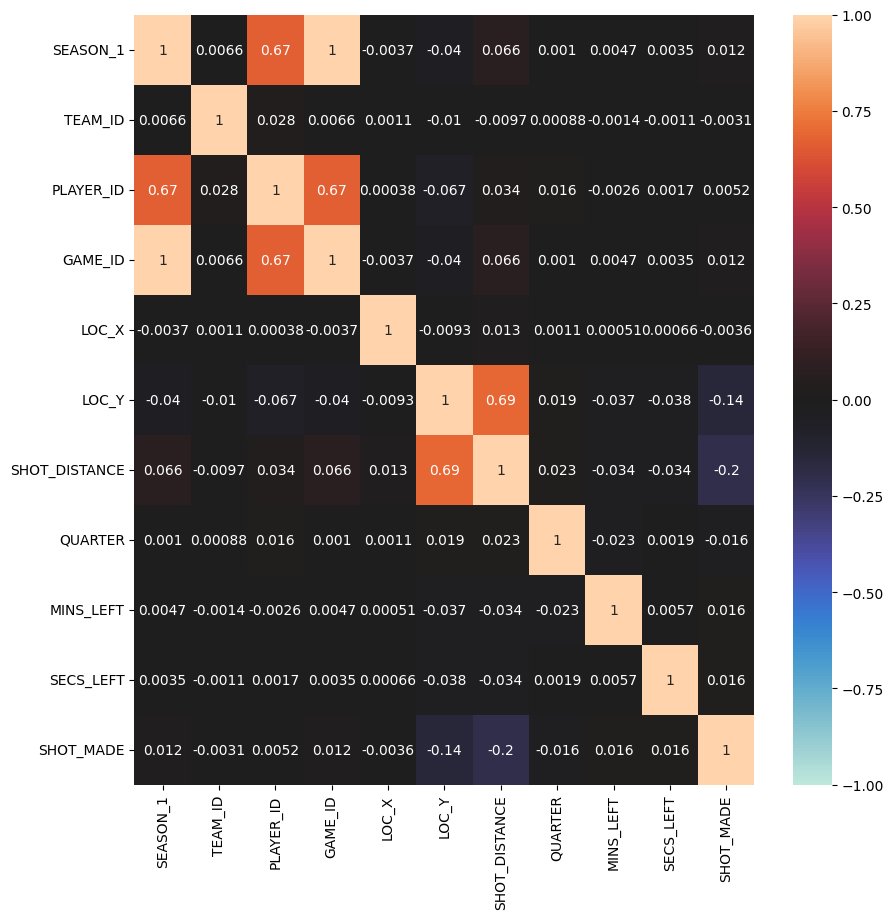

In [64]:
# heatmap w/ numerical attributes
# make figure larger
fig, ax = plt.subplots(figsize=(10,10))

heat_vars = numerical_attrib.copy()
heat_vars.append('SHOT_MADE')
sns.heatmap(data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

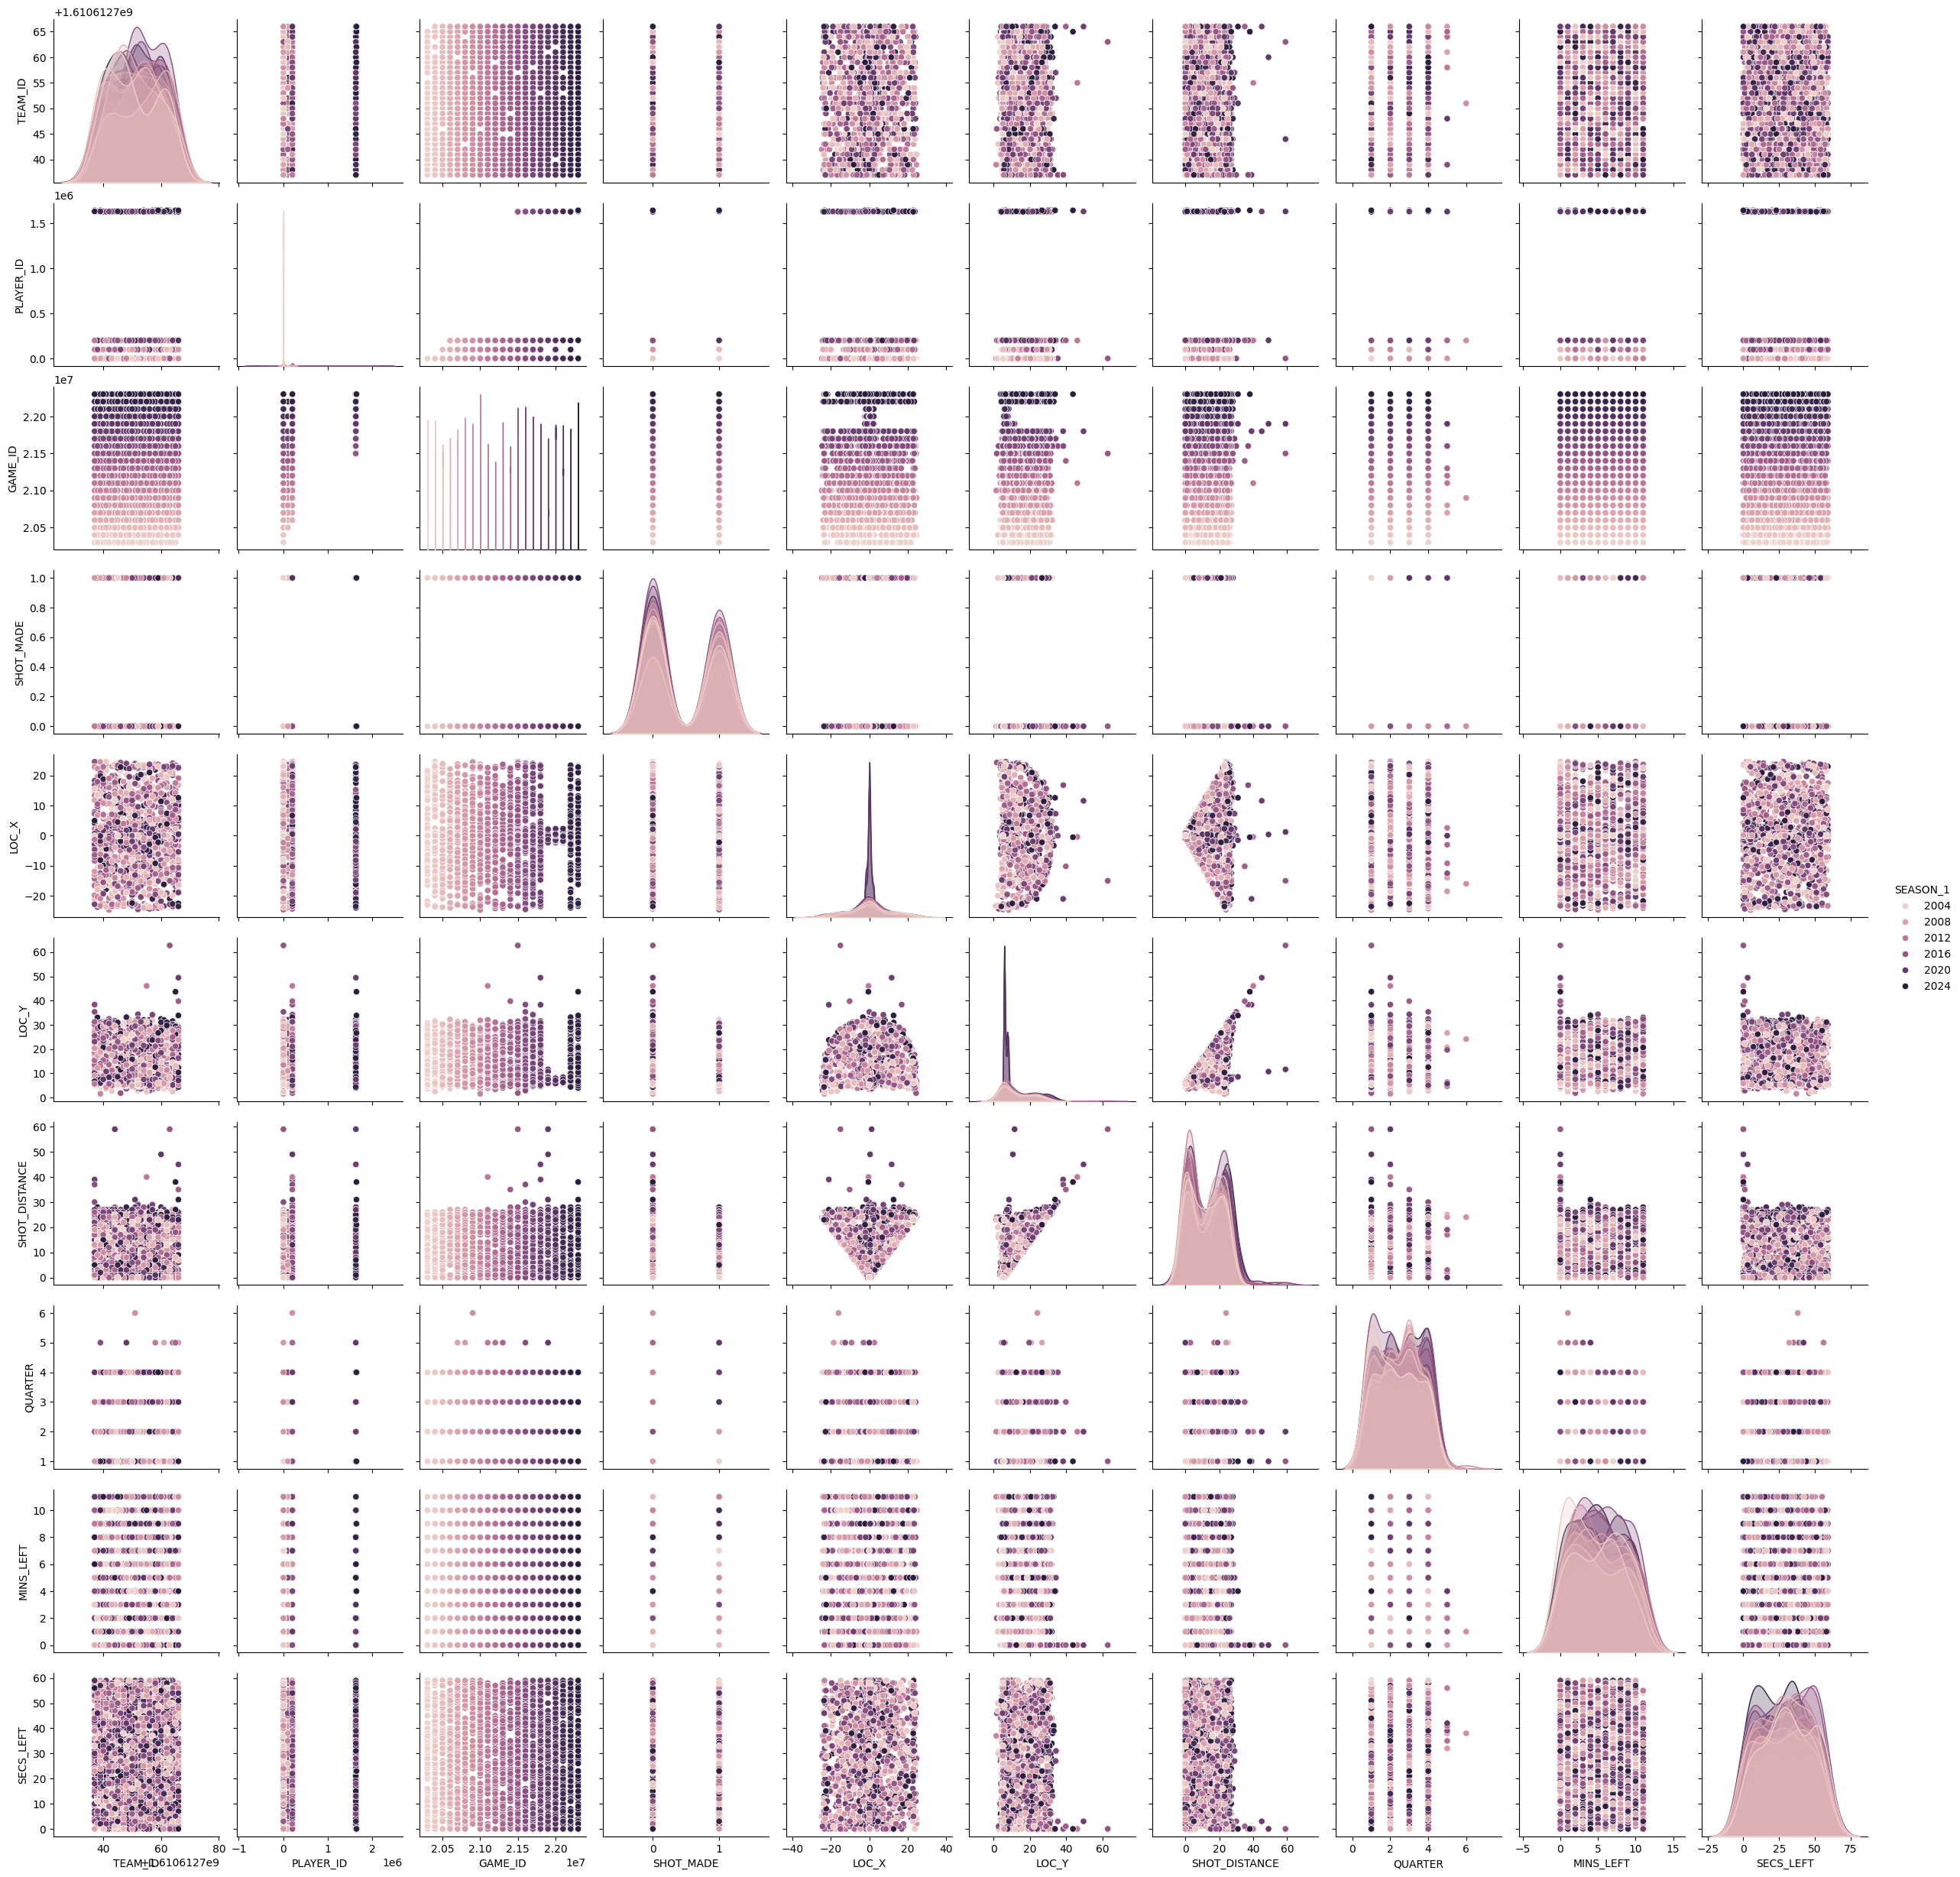

In [65]:
# pairplot with sample of data
sample = data.sample(int(len(data) * 0.0005))
sns.pairplot(sample, hue='SEASON_1', diag_kind='auto')

# Pre-Processing

In [66]:
print(data.columns)

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')


In [67]:
# Dropping redundant attributes
Preprocessed_Data = data.drop('SEASON_2', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('TEAM_NAME', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('PLAYER_NAME', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('POSITION', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('GAME_DATE', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('EVENT_TYPE', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('ZONE_NAME', axis=1)

In [68]:
# Encoding Categorical data
attributes_to_encode = ['POSITION_GROUP', 'HOME_TEAM', 'AWAY_TEAM', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE']

for attribute in attributes_to_encode:
  encoding = 0
  observations = Preprocessed_Data[attribute].unique()
  for observation in observations:
    if pd.isna(observation): # dropping columns with missing values
      Preprocessed_Data = Preprocessed_Data.dropna()
    else:
      Preprocessed_Data.loc[Preprocessed_Data[attribute] == observation, attribute] = encoding
      encoding += 1

In [69]:
# Further Exploration
Preprocessed_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4223332 entries, 0 to 4231261
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SEASON_1        int64  
 1   TEAM_ID         int64  
 2   PLAYER_ID       int64  
 3   POSITION_GROUP  object 
 4   GAME_ID         int64  
 5   HOME_TEAM       object 
 6   AWAY_TEAM       object 
 7   SHOT_MADE       bool   
 8   ACTION_TYPE     object 
 9   SHOT_TYPE       object 
 10  BASIC_ZONE      object 
 11  ZONE_ABB        object 
 12  ZONE_RANGE      object 
 13  LOC_X           float64
 14  LOC_Y           float64
 15  SHOT_DISTANCE   int64  
 16  QUARTER         int64  
 17  MINS_LEFT       int64  
 18  SECS_LEFT       int64  
dtypes: bool(1), float64(2), int64(8), object(8)
memory usage: 616.2+ MB


<Axes: >

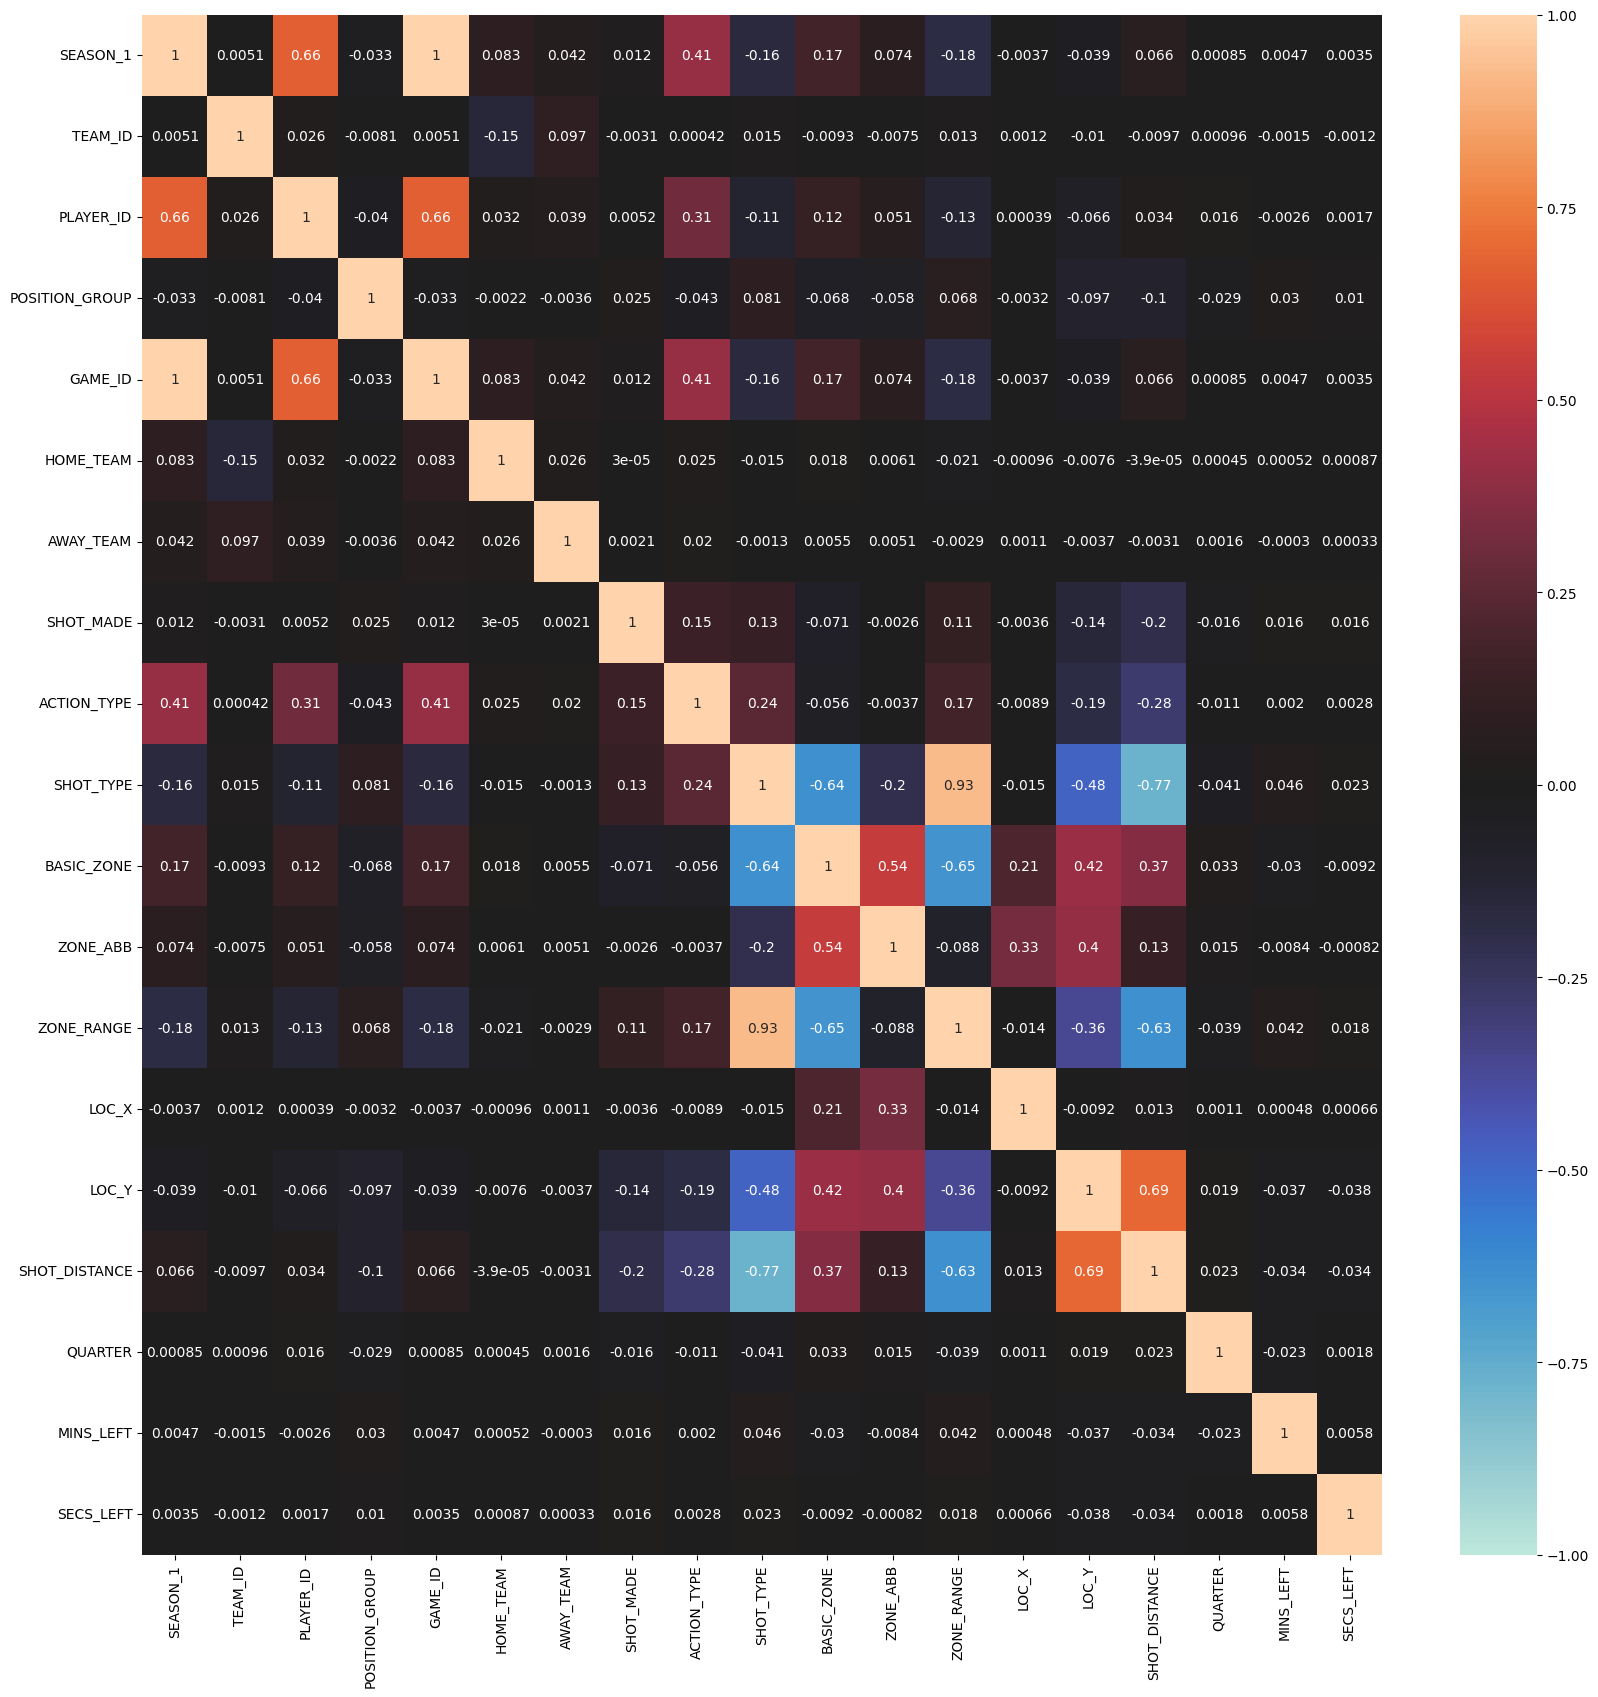

In [70]:
# heatmap w/ preprocessed attributes

# make figure larger
fig, ax = plt.subplots(figsize=(20,20))

attributes = list(Preprocessed_Data.columns)
heat_vars = attributes.copy()
sns.heatmap(Preprocessed_Data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

In [71]:
# Zone Range and shot type are highly correlated, dropping shot dist
Preprocessed_Data = Preprocessed_Data.drop(columns='SHOT_DISTANCE', axis=1)

# Also dropping Season_1 and Game_ID
Preprocessed_Data = Preprocessed_Data.drop(columns='GAME_ID', axis=1)
Preprocessed_Data = Preprocessed_Data.drop(columns='SEASON_1', axis=1)

<Axes: >

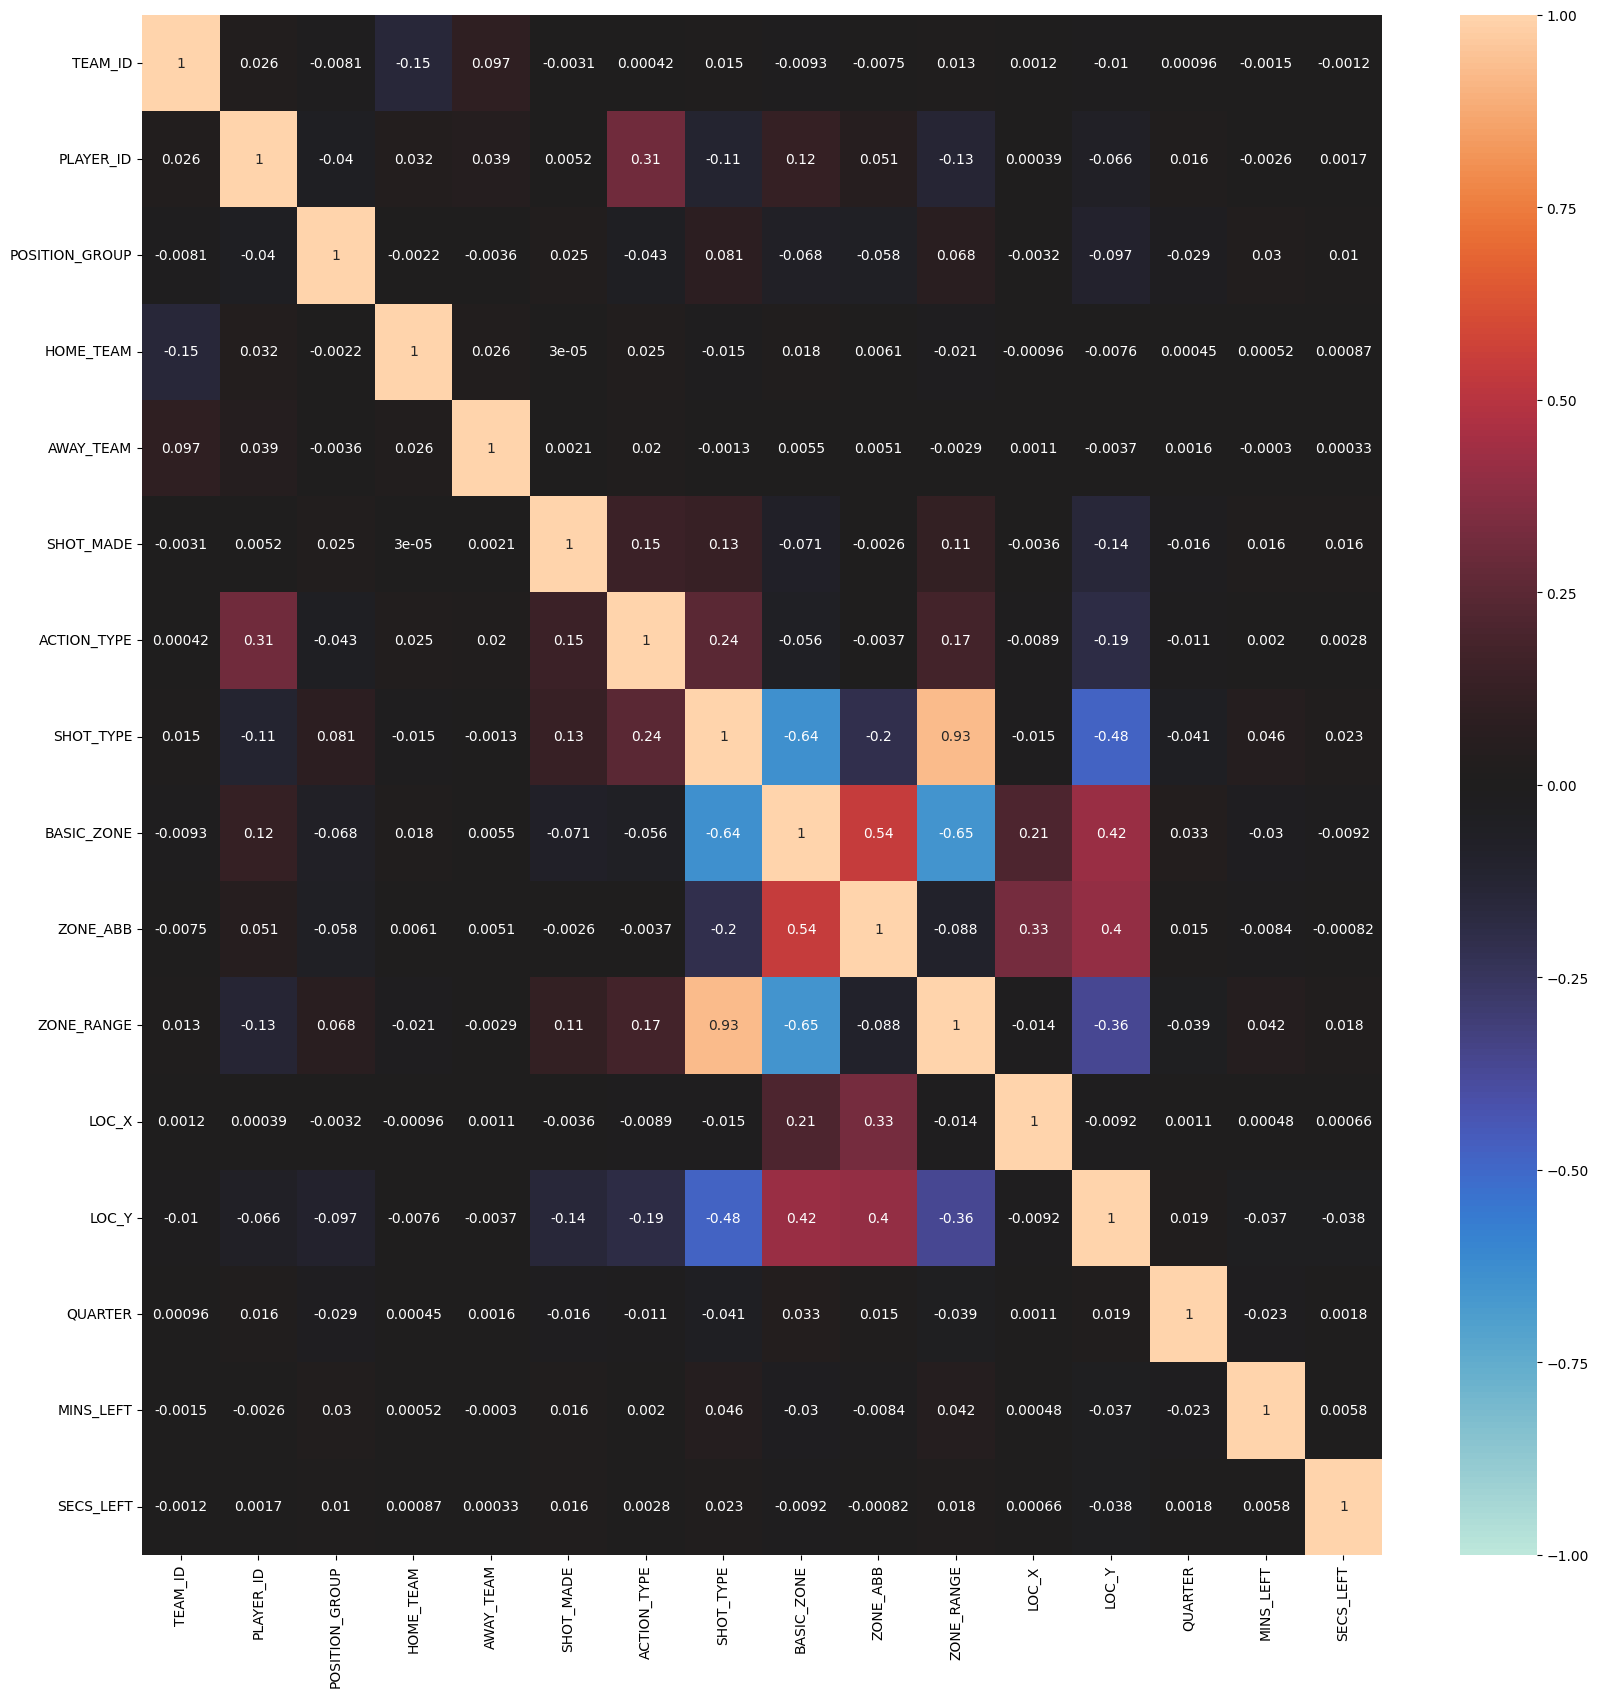

In [72]:
# Second heatmap to check for other highly correlated values

fig, ax = plt.subplots(figsize=(20,20))

attributes = list(Preprocessed_Data.columns)
heat_vars = attributes.copy()
sns.heatmap(Preprocessed_Data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

In [73]:
# Splitting data (20/80 split)
y = Preprocessed_Data.SHOT_MADE
x = Preprocessed_Data.drop('SHOT_MADE', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# Checking if our data has the right dimensions
print('xTrain shape:', x_train.shape)
print('yTrain shape:', y_train.shape)
print('xTest shape:', x_test.shape)
print('yTest shape:', y_test.shape)

xTrain shape: (3378665, 15)
yTrain shape: (3378665,)
xTest shape: (844667, 15)
yTest shape: (844667,)


In [74]:
# Scaling data
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder

x_numerical_columns = ['TEAM_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']
x_categorical_columns = ['POSITION_GROUP', 'HOME_TEAM', 'AWAY_TEAM', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE']

# Scaling numerical data
scaler = StandardScaler()
scaler.fit(Preprocessed_Data[x_numerical_columns]) # Training scaler not yet doing the actual scaling

StandardScaler()

In [75]:
# Encoding categorical data & Scaling numerical date

preprocessed_hot = pd.get_dummies(Preprocessed_Data, columns = x_categorical_columns)
x_train, x_test, y_train, y_test = train_test_split(preprocessed_hot.drop('SHOT_MADE', axis=1), preprocessed_hot.SHOT_MADE, test_size=0.2, random_state=21)

# Scaling data that has been split
x_train_numerical = scaler.transform(x_train[x_numerical_columns])
x_test_numerical = scaler.transform(x_test[x_numerical_columns])

# Create a panda dataframe to replace non-scaled columns
x_train_numerical = pd.DataFrame(x_train_numerical, columns=x_numerical_columns, index=x_train.index)
x_test_numerical = pd.DataFrame(x_test_numerical, columns=x_numerical_columns, index=x_test.index)

# Creating a copy of non-scaled data
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

# Replacing non-scaled columsn
x_train_scaled[x_numerical_columns] = x_train_numerical
x_test_scaled[x_numerical_columns] = x_test_numerical

# Note: Non-scaled data is still available incase there are models that work better using that

In [76]:
print('Encoded and scaled data: ')
print(x_train_scaled.head())
print(' x_train shape: ', x_train_scaled.shape)
print(' x_test shape: ', x_test_scaled.shape)

Encoded and scaled data: 
          TEAM_ID  PLAYER_ID     LOC_X     LOC_Y   QUARTER  MINS_LEFT  \
2158735  1.335770  -0.339295 -0.107634 -0.504766 -1.301578  -1.541909   
3262316 -1.675307   1.980441 -2.269128 -0.706389  1.335800  -1.541909   
1096072 -0.401390  -0.670367 -0.009251 -0.834961  0.456674  -0.675575   
397633   1.567392  -0.667775  1.334986 -0.531064 -0.422452   1.057092   
3638837 -0.169768  -0.342406 -0.009251 -0.834961  1.335800   1.634648   

         SECS_LEFT  POSITION_GROUP_0  POSITION_GROUP_1  POSITION_GROUP_2  ...  \
2158735  -1.419576             False              True             False  ...   
3262316   0.815438              True             False             False  ...   
1096072   1.732367             False              True             False  ...   
397633    1.388518              True             False             False  ...   
3638837   0.815438             False              True             False  ...   

         ZONE_ABB_1  ZONE_ABB_2  ZONE_ABB_3  ZON

In [77]:
# Checking if our data has the right dimensions

print('xTrain shape:', x_train_scaled.shape)
print('yTrain shape:', y_train.shape)
print('xTest shape:', x_test_scaled.shape)
print('yTest shape:', y_test.shape)

xTrain shape: (3378665, 168)
yTrain shape: (3378665,)
xTest shape: (844667, 168)
yTest shape: (844667,)


# First Model

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Lists to store errors
train_errors = []
test_errors = []
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Loop through different regularization strengths
for c in c_values:
    model = LogisticRegression(C=c, solver='liblinear', max_iter=1000, random_state=21)
    model.fit(x_train_scaled, y_train)

    # Predict class labels
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Compute 1 - Accuracy (Error)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))



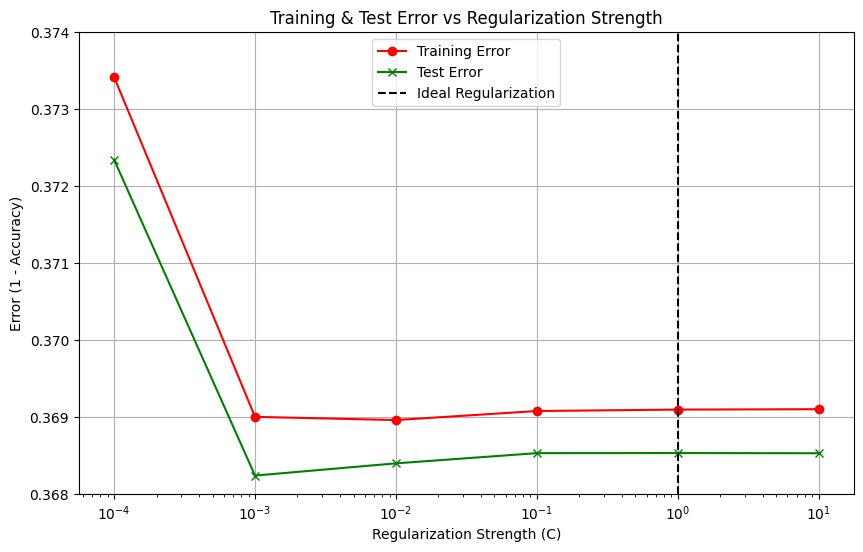

In [79]:
# Plot training vs test error
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_errors, label='Training Error', marker='o', linestyle='-', color='red')
plt.plot(c_values, test_errors, label='Test Error', marker='x', linestyle='-', color='green')

# Regularization strength scale
plt.xscale('log')
plt.ylim(0.368, 0.374)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Training & Test Error vs Regularization Strength')
plt.axvline(x=1, linestyle='--', color='black', label='Ideal Regularization')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Training first model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Train Logistic Regression model
logisticModel = LogisticRegression(C=1, solver='lbfgs', max_iter=1000, random_state=21)  # Example: Set C=1
logisticModel.fit(x_train_scaled, y_train)

# Predict class labels
y_train_pred = logisticModel.predict(x_train_scaled)
y_test_pred = logisticModel.predict(x_test_scaled)

# Predict probabilities (for log loss)
y_train_proba = logisticModel.predict_proba(x_train_scaled)[:, 1]
y_test_proba = logisticModel.predict_proba(x_test_scaled)[:, 1]

# Evaluate using metrics
train_log_loss = log_loss(y_train, y_train_proba)  # Using predicted probabilities
test_log_loss = log_loss(y_test, y_test_proba)


In [81]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


# Log loss
print("\n")
print("Training Log Loss:", train_log_loss)
print("Test Log Loss:", test_log_loss)

# Classification reports
print("\n")
print("Training Performance:")
print(classification_report(y_train, y_train_pred))
print("\n")
print("Test Performance:")
print(classification_report(y_test, y_test_pred))

# More evaluation metrics (TP, TN, FP, FN)
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Identify Correct, FP, and FN
test_results['Type'] = 'Correct'
test_results.loc[(test_results['Actual'] == 0) & (test_results['Predicted'] == 1), 'Type'] = 'FP'
test_results.loc[(test_results['Actual'] == 1) & (test_results['Predicted'] == 0), 'Type'] = 'FN'

print("\n")
print("Classified predictions of Test Dataset:")
test_results.head()

Confusion Matrix (Test Data):
[[386637  72052]
 [239252 146726]]


Training Log Loss: 0.6377186199363664
Test Log Loss: 0.637141898552408


Training Performance:
              precision    recall  f1-score   support

       False       0.62      0.84      0.71   1831715
        True       0.67      0.38      0.49   1546950

    accuracy                           0.63   3378665
   macro avg       0.64      0.61      0.60   3378665
weighted avg       0.64      0.63      0.61   3378665



Test Performance:
              precision    recall  f1-score   support

       False       0.62      0.84      0.71    458689
        True       0.67      0.38      0.49    385978

    accuracy                           0.63    844667
   macro avg       0.64      0.61      0.60    844667
weighted avg       0.64      0.63      0.61    844667



Classified predictions of Test Dataset:


Actual  Predicted     Type
1118264   False      False  Correct
3970316    True       True  Correct
1457364   False      False  Correct
1849149    True      False       FN
2776147   False      False  Correct

# Second Model: Decision Trees

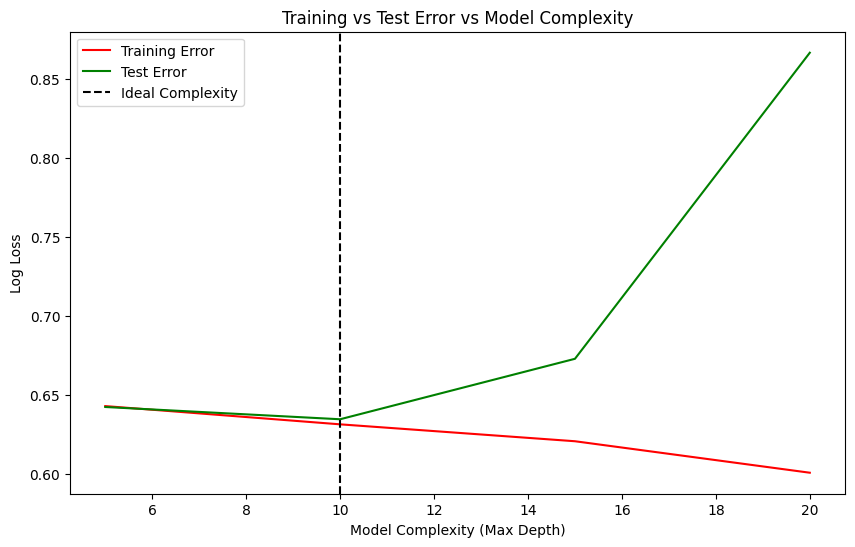

In [82]:
# Tuning hyperparameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

train_errors = []
test_errors = []
complexities = [5, 10, 15, 20]  # Example: Varying max_depth for decision trees

for max_depth in complexities:

    tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth, min_samples_split = 20, random_state = 9)
    tree_model.fit(x_train, y_train)

    # Predict probabilities
    y_train_proba = tree_model.predict_proba(x_train)
    y_test_proba = tree_model.predict_proba(x_test)

    # Compute log loss
    train_errors.append(log_loss(y_train, y_train_proba))
    test_errors.append(log_loss(y_test, y_test_proba))

# Plot training vs test error
plt.figure(figsize=(10, 6))
plt.plot(complexities, train_errors, label='Training Error', color='red')
plt.plot(complexities, test_errors, label='Test Error', color='green')
plt.axvline(x=10, linestyle='--', color='black', label='Ideal Complexity')
plt.xlabel('Model Complexity (Max Depth)')
plt.ylabel('Log Loss')
plt.title('Training vs Test Error vs Model Complexity')
plt.legend()
plt.show()

In [83]:
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 20, min_samples_leaf = 10, random_state = 9)
tree_model.fit(x_train, y_train)

# Predict on training and test data
y_train_pred_tree = tree_model.predict(x_train)
y_test_pred_tree = tree_model.predict(x_test)

# Calculating error metrics
train_error = log_loss(y_train, y_train_pred_tree)
test_error = log_loss(y_test, y_test_pred_tree)

In [85]:
# Confusion Matrix
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


# Log loss
print("\n")
print("Training Log Loss:", train_error)
print("Test Log Loss:", test_error)

# Classification reports
print("\n")
print("Training Performance:")
print(classification_report(y_train, y_train_pred_tree))
print("\n")
print("Test Performance:")
print(classification_report(y_test, y_test_pred_tree))

# More evaluation metrics (TP, TN, FP, FN)
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Identify Correct, FP, and FN
test_results['Type'] = 'Correct'
test_results.loc[(test_results['Actual'] == 0) & (test_results['Predicted'] == 1), 'Type'] = 'FP'
test_results.loc[(test_results['Actual'] == 1) & (test_results['Predicted'] == 0), 'Type'] = 'FN'

print("\n")
print("Classified predictions of Test Dataset:")
test_results.head()

Confusion Matrix (Test Data):
[[386637  72052]
 [239252 146726]]


Training Log Loss: 12.981226317317581
Test Log Loss: 12.97349115401278


Training Performance:
              precision    recall  f1-score   support

       False       0.62      0.85      0.72   1831715
        True       0.69      0.39      0.50   1546950

    accuracy                           0.64   3378665
   macro avg       0.65      0.62      0.61   3378665
weighted avg       0.65      0.64      0.62   3378665



Test Performance:
              precision    recall  f1-score   support

       False       0.62      0.85      0.72    458689
        True       0.68      0.39      0.50    385978

    accuracy                           0.64    844667
   macro avg       0.65      0.62      0.61    844667
weighted avg       0.65      0.64      0.62    844667



Classified predictions of Test Dataset:


Actual  Predicted     Type
1118264   False      False  Correct
3970316    True       True  Correct
1457364   False      False  Correct
1849149    True      False       FN
2776147   False      False  Correct